<a href="https://colab.research.google.com/github/victor-onoja/DeepLearningLearning/blob/main/LinearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

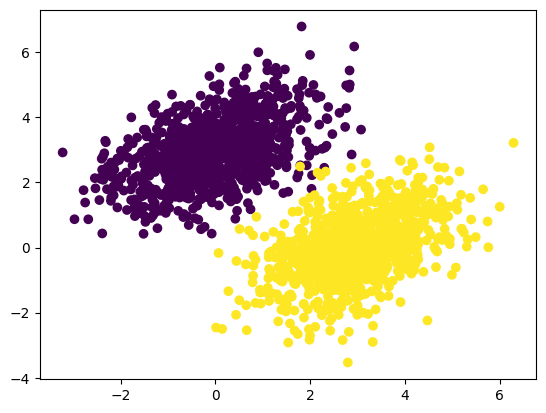

In [1]:
import matplotlib.pyplot as plt
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


In [3]:
import tensorflow as tf

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 3.5634
Loss at step 1: 0.4612
Loss at step 2: 0.1760
Loss at step 3: 0.1387
Loss at step 4: 0.1265
Loss at step 5: 0.1175
Loss at step 6: 0.1094
Loss at step 7: 0.1021
Loss at step 8: 0.0954
Loss at step 9: 0.0894
Loss at step 10: 0.0838
Loss at step 11: 0.0788
Loss at step 12: 0.0741
Loss at step 13: 0.0699
Loss at step 14: 0.0661
Loss at step 15: 0.0626
Loss at step 16: 0.0594
Loss at step 17: 0.0565
Loss at step 18: 0.0539
Loss at step 19: 0.0514
Loss at step 20: 0.0492
Loss at step 21: 0.0472
Loss at step 22: 0.0454
Loss at step 23: 0.0437
Loss at step 24: 0.0422
Loss at step 25: 0.0408
Loss at step 26: 0.0395
Loss at step 27: 0.0384
Loss at step 28: 0.0373
Loss at step 29: 0.0364
Loss at step 30: 0.0355
Loss at step 31: 0.0347
Loss at step 32: 0.0340
Loss at step 33: 0.0333
Loss at step 34: 0.0327
Loss at step 35: 0.0321
Loss at step 36: 0.0316
Loss at step 37: 0.0312
Loss at step 38: 0.0308
Loss at step 39: 0.0304


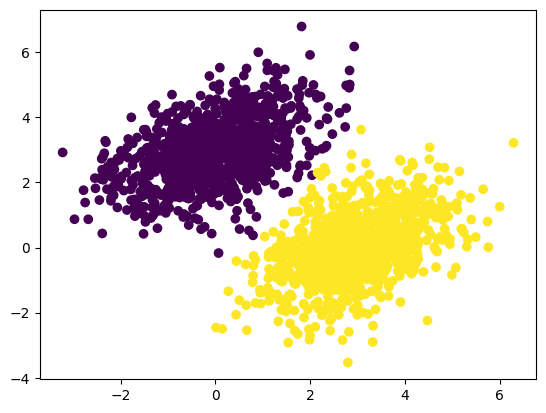

In [4]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

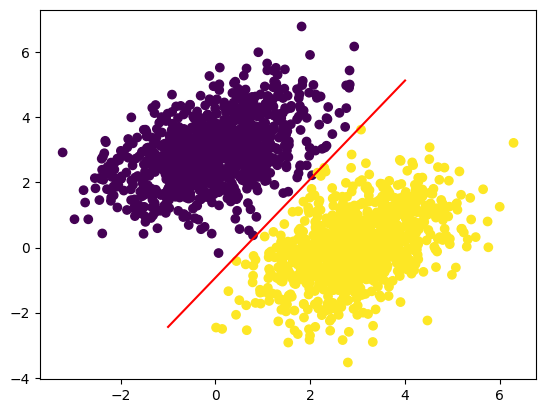

In [5]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()